In [153]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Defined
Collaction a multiple of data is colled data set. I have used Kaggle to defined a data

# Attaching a file

In [155]:
file_path = ("/shanghai_ranking_2024.csv")
df = pd.read_csv(file_path)

# Brief overview of the dataset

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [157]:
print(df.head())

  Rank                              University_Name National/Regional Rank  \
0    1                           Harvard University                      1   
1    2                          Stanford University                      2   
2    3  Massachusetts Institute of Technology (MIT)                      3   
3    4                      University of Cambridge                      1   
4    5           University of California, Berkeley                      4   

   Alumni  Award   Hici    N&S    PUB   PCP  
0   100.0   97.1  100.0  100.0  100.0  85.7  
1    45.3   88.1   73.1   83.9   73.1  59.6  
2    71.9   82.8   55.2   70.8   59.1  73.6  
3    78.2   90.8   45.1   59.8   67.2  60.6  
4    65.3   76.5   46.9   62.8   57.1  55.5  


In [158]:
print(df.describe())

            Alumni       Award         Hici         N&S          PUB  \
count  1000.000000  1000.00000  1000.000000  989.000000  1000.000000   
mean      4.509600     3.78120    10.734400   10.575126    35.113000   
std      10.103201    11.45538    10.949265   10.637247    13.684495   
min       0.000000     0.00000     0.000000    0.000000     9.300000   
25%       0.000000     0.00000     0.000000    3.900000    25.775000   
50%       0.000000     0.00000     9.200000    7.300000    31.700000   
75%       0.000000     0.00000    14.600000   13.300000    41.425000   
max     100.000000   100.00000   100.000000  100.000000   100.000000   

               PCP  
count  1000.000000  
mean     19.655300  
std       8.800436  
min       8.600000  
25%      14.100000  
50%      17.600000  
75%      23.000000  
max     100.000000  


# Distribution of the university rankings

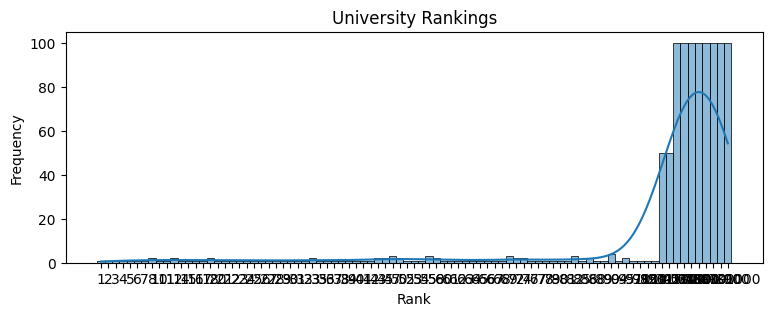

In [159]:
plt.figure(figsize=(9, 3))
sns.histplot(df['Rank'], kde=True, bins=10)
plt.title('University Rankings')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

In [160]:
df[df.isna().any(axis=1)]

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
187,151-200,London School of Economics and Political Science,13-20,22.0,15.0,11.3,NaN,30.6,29.0
300,301-400,Toulouse Capitole University,16-Dec,0.0,27.6,0.0,NaN,11.8,32.3
372,301-400,Renmin University of China,52-74,0.0,0.0,9.2,NaN,36.6,15.9
715,701-800,University of International Business and Econo...,138-156,0.0,0.0,6.5,NaN,21.5,13.4
725,701-800,Tilburg University,13,0.0,0.0,0.0,NaN,25.9,16.9
729,701-800,Southwestern University of Finance and Economics,138-156,0.0,0.0,0.0,NaN,27.3,13.5
739,701-800,HSE University,5,0.0,0.0,0.0,NaN,27.1,13.0
752,701-800,Copenhagen Business School,6,0.0,0.0,9.2,NaN,19.3,10.3
754,701-800,Stockholm School of Economics,12-Nov,0.0,14.6,0.0,NaN,11.1,19.7
886,801-900,Zhongnan University of Economics and Law,157-179,0.0,0.0,0.0,NaN,24.3,11.3


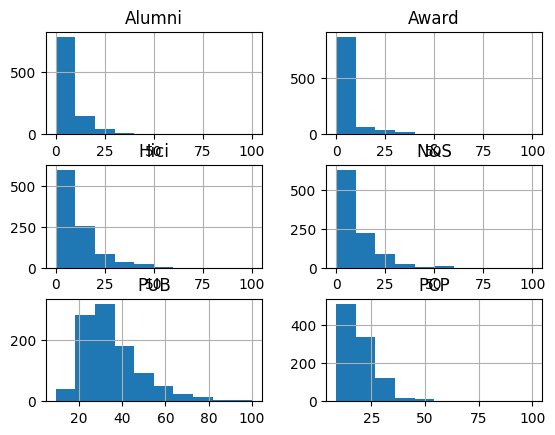

In [161]:
df.hist()
plt.show()

# Creating a figure

<Axes: xlabel='Hici', ylabel='Count'>

<Figure size 900x300 with 0 Axes>

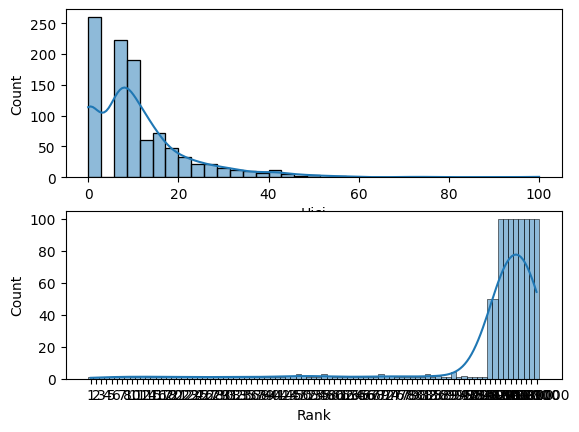

In [162]:

plt.figure(figsize=(9, 3))
fig, axs = plt.subplots(2, 1)
sns.histplot(df['Rank'], kde=True ,ax=axs[1])
sns.histplot(df['Hici'], kde=True ,ax=axs[0])

In [163]:
data_cleaned = data.dropna()

# Heatmap define

<ipython-input-164-bbd281cff125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Rank'] = data_cleaned['Rank'].str.split('-').str[0].astype(float)


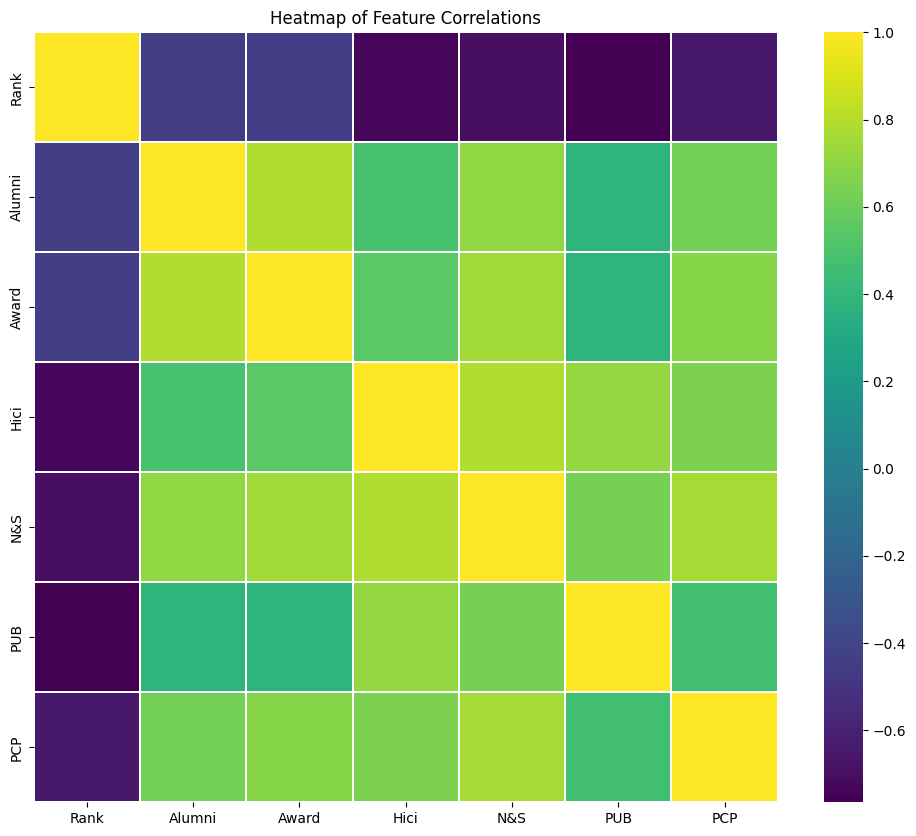

In [164]:
# Convert 'Rank' column to values
data_cleaned['Rank'] = data_cleaned['Rank'].str.split('-').str[0].astype(float)

#Select numerical features for correlation
numerical_data = data_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), cmap='viridis', linecolor='white', linewidth=0.1)
plt.title('Heatmap of Feature Correlations')
plt.show()


# References
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html                                                                         
https://seaborn.pydata.org/generated/seaborn.histplot.html                                                                           
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# How EDA Helps in the Achieving of Goals
Understanding Dataset Distribution: A clear picture of the data's overall distribution, outliers, and clustering is given by the histogram and boxplots.
Finding the Important Elements The correlation matrix aids in determining traits most connected to high ranking.
Making Decisions: These insights can direct future university funding or policy modifications.

